<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Logistic Regression - Cost Function and Tuning</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 3: Topic 25</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss


#### Logistic Regression

Fit $\textbf{w}$ and $b$ to get seperating plane between classes:


<center><img src = "images/logregfit.png"></center>

- optimize probabilities of each data point in trainset for class 0 and class 1
- learn parameters for sigmoid $\sigma(X|\textbf{w}, b)$

But how did it optimize $\textbf{w}$ and $b$?

The logistic regression cost function

For N training points: 
$$ J = \frac{1}{N}\sum_{i=1}^{N}J_s(y_i, X_i, \textbf{w}, b) $$

where $J_s(y_i, X_i, \textbf{w}, b)$ is the cost incurred on a single training point

where the single point cost look is:

$$ J_s(y_i, X_i, \textbf{w}, b) = \begin{cases} 
      -\log(\sigma(X_i| \textbf{w}, b)) & y_i = 1 \\
      -\log(1 - \sigma(X_i| \textbf{w}, b)) & y_i = 0 
   \end{cases}
$$

$ P(y_i = 1|X_i) =  \sigma(X_i| \textbf{w}, b)) = \hat{y}$

$$ J_s(y_i, X_i, \textbf{w}, b) = \begin{cases} 
      -\log(\hat{y}) & y_i = 1 \\
      -\log(1 - \hat{y}) & y_i = 0 
   \end{cases}
$$

where $\hat{y} = \sigma(X_i| \textbf{w}, b)) $

In [27]:
%%capture logreg_cost
fig, ax = plt.subplots(1,2, figsize = (10,5))
epsilon = 1e-2
yhat = np.linspace(epsilon,1-epsilon, 100) # probability must range between 0 and 1
ax[0].plot(yhat, -np.log(yhat))
ax[0].set_title(r'If: $y_i = 1$', size = 20)
ax[0].set_xlabel(r'$\hat{y}_i$', size = 15)
ax[0].set_ylabel(r'$\log(\hat{y}_i)$', size = 15)

ax[1].plot(yhat, -np.log(1 - yhat))
ax[1].set_ylabel(r'$\log(1 - \hat{y}_i)$', size = 15)
ax[1].set_title(r'If: $y_i = 0$' , size = 20)
ax[1].set_xlabel(r'$\hat{y}_i$', size = 15)
plt.tight_layout()

Let's get an intuition for this cost function on a single training point:

$$ J_s(y_i, X_i) = \begin{cases} 
      -\log(\hat{y}) & y_i = 1 \\
      -\log(1 - \hat{y}) & y_i = 0 
   \end{cases}
$$

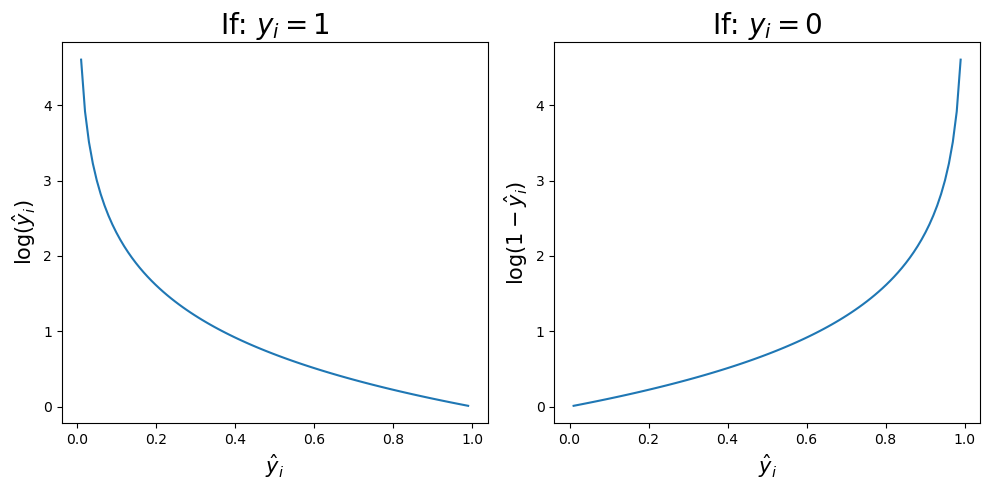

In [28]:
logreg_cost()

When $y_i = 1$:
- If logistic regression estimates $\hat{y}_i = P(y_i = 1|X)$ is low 
- estimates low probability of belong to correct class
- heavily penalizes this.

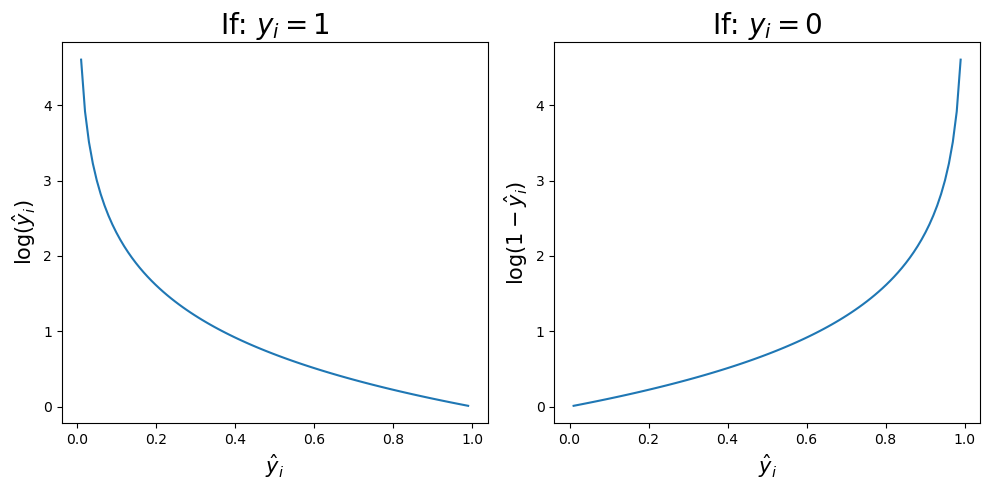

In [29]:
logreg_cost()

When $y_i = 0$:
- If logistic regression estimates $\hat{y}_i = P(y_i = 1|X)$ close to 1
- estimating high probability belongs to wrong class!
- heavily penalizes this also.

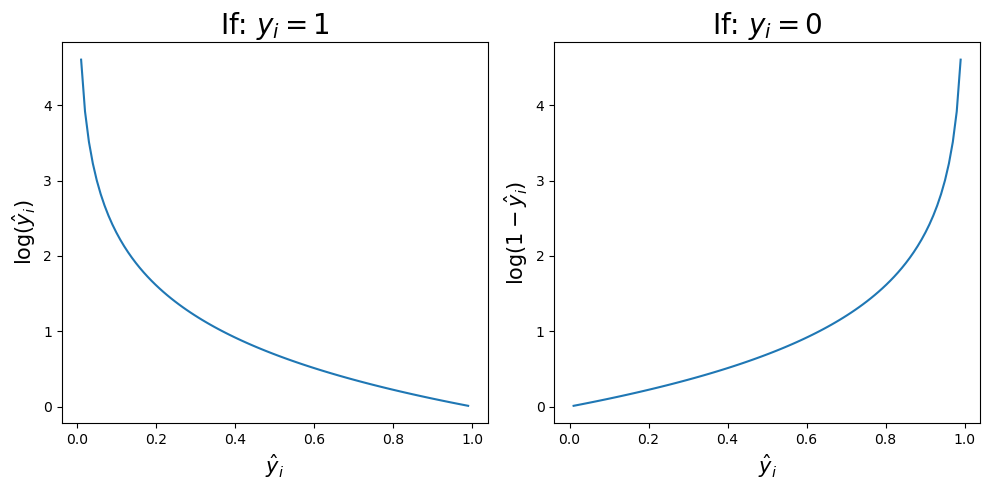

In [30]:
logreg_cost()

Single point cost

$$ J_s(y_i, \hat{y}_i) = \begin{cases} 
      -\log(\hat{y}_i) & y_i = 1 \\
      -\log(1 - \hat{y}_i) & y_i = 0 
   \end{cases}
$$

where 

$\hat{y} = P(y_i = 1|X_i) =  \sigma(X_i| \textbf{w}, b))$

Takes on equivalent and simpler form:

$$ J_s(y_i, \hat{y}_i) = -y_i \log(\hat{y}_i)
      - (1 - y_i)\log(1 - \hat{y}_i)$$

In training we need to consider all $N$ training points:

$$ J = -\frac{1}{N}\sum_{i=1}^{N} \Big(y_i \log(\hat{y}_i)
      + (1 - y_i)\log(1 - \hat{y}_i) \Big) $$

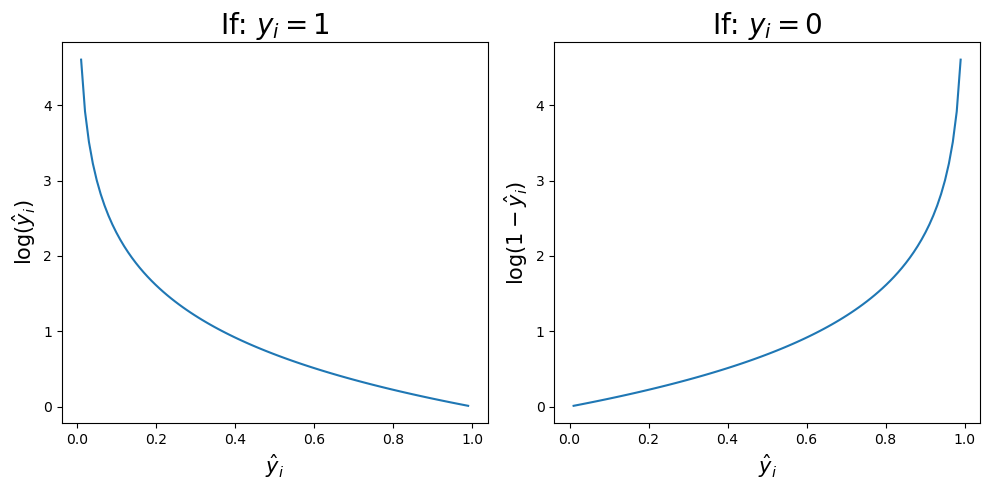

In [31]:
logreg_cost()

Try to minimizes these as much as possible across all training points.

Tuning probabilities $\hat{y}$ by changing $\textbf{w}$ and $b$ (parameters of sigmoid):

$$\hat{y} = P(y=1|X, \textbf{w}, b) = \frac{1}{1 + \exp\Big[{-\textbf{w}^T \textbf{X} + b}\Big]}$$


#### Summary

Minimizing:

$$ J = -\frac{1}{N}\sum_{i=1}^{N} \Big(y_i \log(\hat{y}_i)
      + (1 - y_i)\log(1 - \hat{y}_i) \Big) $$
      
by tuning $\textbf{w}$ and $b$.


 Gets: 
 $$ \hat{y} = P(y=1|X, \textbf{w}, b) = \sigma(X| \textbf{w}, b)$$
 
 best representing statistics/spread accross all training data $ (y_i, X_i) $

$$ J = -\frac{1}{N}\sum_{i=1}^{N} \Big(y_i \log(\hat{y}_i)
      + (1 - y_i)\log(1 - \hat{y}_i) \Big) $$
      

- Sometimes called *log loss* function
- Other times known as *binary cross-entropy*

Has nice property that $J$ has a single minimum with respect to $\textbf{w}$ and $b$.

#### Optimization

No closed form solution for $\textbf{w}$ and $b$ minimizing cost function

Need to use iterative algorithm to solve:
- gradient descent
- other faster methods:
    - Newton CG methods (liblinear, LBFGS)

<center><img src = "images/NewtownvsGradDescent.png" width = 800></center>
<center> Gradient descent vs. Newton methods</center>

When calling sklearn's LogisticRegression() can try different optimizers:
- lbfgs (default)
- liblinear (good for small datasets)
- newton-cg (old-school)
- sag

In [32]:
logreg_clf = LogisticRegression(
    solver = 'liblinear', max_iter = 1000 )

Maximum solver iterations:

- max_iter: 100 (default) 
- sometimes larger number required to assure convergence

Different optimizers converge quicker:
- test and take fastest for your training data before going into hyperparameter tuning

#### Logistic Regression: Regularization and Hyperparameter Runing

- $C$ is weight regularization hyperparameter
- $C = 1$ is default

In [33]:
logreg_clf = LogisticRegression(
    solver = 'newton-cg', max_iter = 1000, C = 1)

$$ J = -\frac{1}{N}\sum_{i=1}^{N} \Big(y_i \log(\hat{y}_i)
      + (1 - y_i)\log(1 - \hat{y}_i) \Big) + \frac{1}{C}|\textbf{w}|_2^2$$

where 

$$ \hat{y}_i = \sigma(X_i|\textbf{w}, b) $$

$C$ is inverse regularization strength:
- smaller $C$, larger regularization
- larger $C$, smaller regularization

Load in penguins dataset subset:

In [34]:
penguin_df = sns.load_dataset('penguins').dropna()
col_list = ['bill_length_mm', 'body_mass_g', 'species']
reduced_pg_df = penguin_df[col_list]

reduced_pg_df =\
reduced_pg_df[reduced_pg_df['species'] != 'Chinstrap']
reduced_pg_df.head()

,bill_length_mm,body_mass_g,species
0,39.1,3750.0,Adelie
1,39.5,3800.0,Adelie
2,40.3,3250.0,Adelie
4,36.7,3450.0,Adelie
5,39.3,3650.0,Adelie


In [35]:
lab_enc_peng= LabelEncoder()
lab_enc_peng.fit(reduced_pg_df['species'])

LabelEncoder()

In [36]:
X = reduced_pg_df.drop(columns = ['species'])
y = lab_enc_peng.transform(reduced_pg_df['species']) # transformed to integer labels

Train-test split and fit/transform standardscaler on training set.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =  42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # transformed X_train

Hyperparameter tune on $C$:
- get best regularized logistic regression model on data
- 5-fold cross validation

In [38]:
C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
cv_scores = []
cv_scores_std = []

for c in C_list:
    logreg = LogisticRegression(C = c) # using default lbfgs solver
    cv_loop_results = cross_validate(
                X=X_train_scaled, 
                y=y_train,
                estimator=logreg, 
                cv=8)
    cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
    cv_scores_std.append(np.std(np.sqrt(np.abs(cv_loop_results['test_score']))))

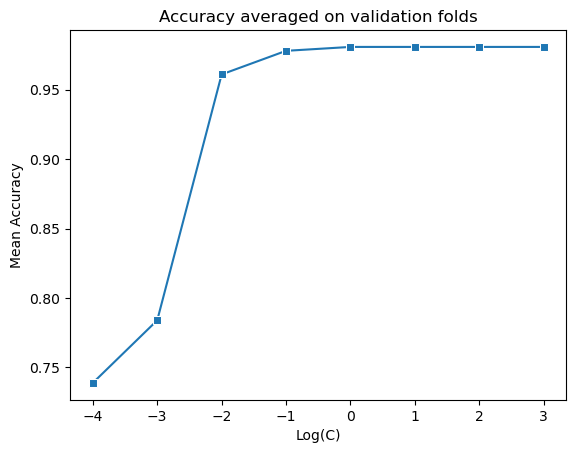

In [39]:
fig, ax = plt.subplots()
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's', ax = ax)
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy averaged on validation folds')
plt.show()

In [40]:
cv_scores

[0.7387703842452852,
 0.7839054397493687,
 0.9610716473018209,
 0.9780718206870909,
 0.9808825966793087,
 0.9808825966793087,
 0.9808825966793087,
 0.9808825966793087]

In [41]:
cv_scores_std

[0.013693876756576665,
 0.04344178941504111,
 0.021926730403494077,
 0.011122139346191266,
 0.007232049927183258,
 0.007232049927183258,
 0.007232049927183258,
 0.007232049927183258]

$C = 1$ (the default regularization) appears to be a good value:
- but don't know this in advance
- always hyperparameter tune

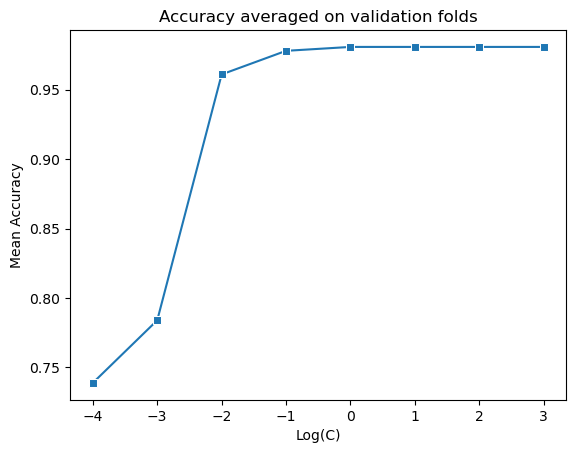

In [42]:
fig, ax = plt.subplots()
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's', ax = ax)
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy averaged on validation folds')
plt.show()

- Poor performance for high regularization (small C):
    - Why?

Let's take the best model ($C = 1$) vs. the worst ($C = 10^{-3}$) and visualize predictions.

In [43]:
logreg_best = LogisticRegression(C=1)
logreg_best.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [44]:
logreg_worst = LogisticRegression(C=1e-3)
logreg_worst.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [45]:
%%capture best_model
X_2Dn = X_train_scaled # scaled features
X_2D = X_train # features on original scale

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx_n, yy_n = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

f, ax = plt.subplots()

Z = logreg_best.predict_proba(np.c_[xx_n.ravel(), yy_n.ravel()])[:,1]
Z = Z.reshape(xx_n.shape)
ax.contourf(xx_n, yy_n, Z, 20, alpha=0.4)
ax.scatter(X_2Dn[:, 0], X_2Dn[:, 1], c = y_train, s=30, edgecolor="k")
ax.set_xlabel('bill depth [mm]')
ax.set_ylabel('body mass [g]')
ax.set_title('Decision Boundary: Logistic Regression')
plt.savefig('images/logregfit.png')
plt.show()

In [46]:
%%capture worst_model

X_2Dn = X_train_scaled # scaled features
X_2D = X_train # features on original scale

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx_n, yy_n = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = logreg_worst.predict_proba(np.c_[xx_n.ravel(), yy_n.ravel()])[:,1]
Z = Z.reshape(xx_n.shape)
ax.contourf(xx_n, yy_n, Z, 20, alpha=0.4)
ax.scatter(X_2Dn[:, 0], X_2Dn[:, 1], c = y_train, s=30, edgecolor="k")
ax.set_xlabel('bill depth [mm]')
ax.set_ylabel('body mass [g]')
ax.set_title('Decision Boundary: Logistic Regression')
plt.savefig('images/logregfit.png')
plt.show()

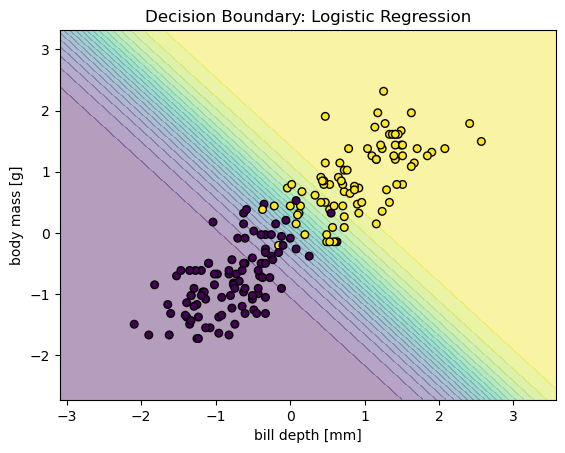

In [47]:
best_model()

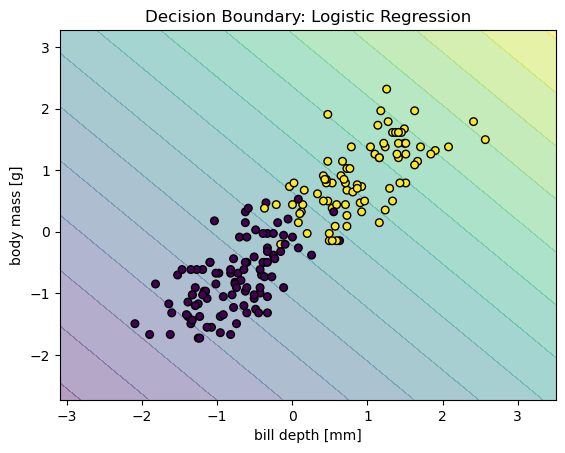

In [48]:
worst_model()

- High regularization (small $C$) widens transition region
- drives $|\textbf{w}|$ too small

$$ J = -\frac{1}{N}\sum_{i=1}^{N} \Big(y_i \log(\hat{y}_i)
      + (1 - y_i)\log(1 - \hat{y}_i) \Big) + \frac{1}{C}|\textbf{w}|_2^2$$

where regularization is L2 penalty on $\textbf{w}$

Want appropriate level of regularization:
- too low a $C$: unrealistically high transition width
- model too stiff in respond to training data away from 50/50 estimator

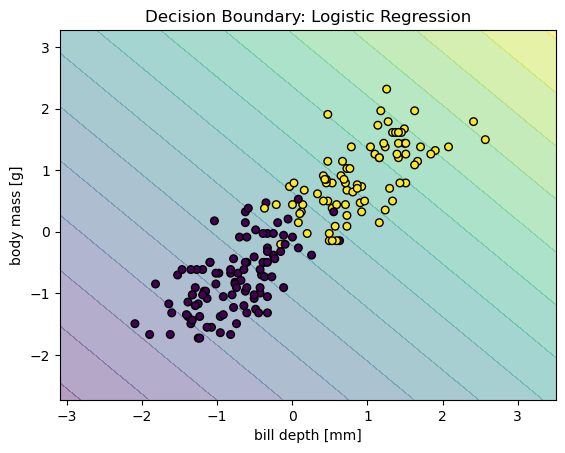

In [49]:
worst_model()

Good amount of regularizatoin:

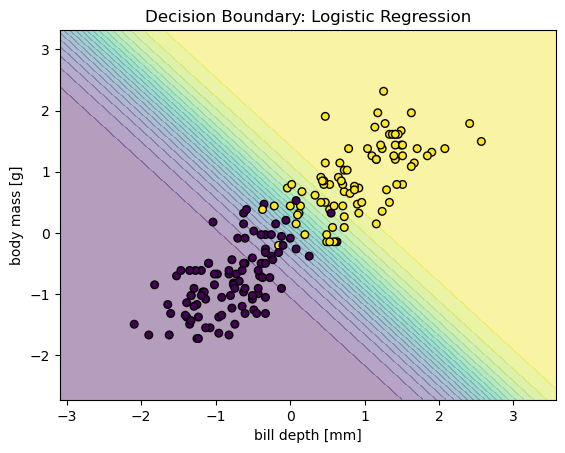

In [50]:
best_model()

- Fits data 
- Models transition well
- Prevents w from being too big

Remember $\textbf{w}$ being too big:
- makes transition region too sharp: 
    - fits as well as possible to training data
    
- but decision boundary unstable: 
    - more training data can change this boundary



Regularizing is necessary in these scenarios.

#### Multiclass Classification

The LogisticRegression() class can be used for multiple target labels:

- will see this as an example next lecture
- known as Multinomial Regression

Next up:
- Classification metrics